<a href="https://colab.research.google.com/github/mleyvaz/CursoMachineLearning/blob/main/Proyecto_ML_CORREGIDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pycaret
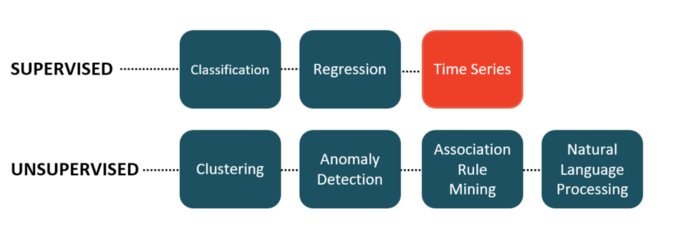

# Intalación

In [ ]:
pip install pycaret

# Ciclo de vida de un proyecto de Machine Learning
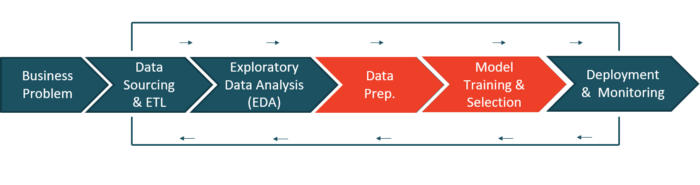

# Problema Comprar un Diamante

Datos

In [ ]:
# load the dataset from pycaret
from pycaret.datasets import get_data
data = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [ ]:
# load the dataset from pycaret
from pycaret.datasets import get_data
data = get_data('automobile')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


Análisis exploratorio se datos

In [ ]:
# plot scatter carat_weight and Price
import plotly.express as px
fig = px.scatter(x=data['engine-size'], y=data['price'], title= "Compra de auto")
fig.show()

In [ ]:
# plot scatter carat_weight and Price
import plotly.express as px
fig = px.scatter(x=data['Carat Weight'], y=data['Price'], 
                 facet_col = data['Cut'], opacity = 0.25, template = 'plotly_dark', trendline='ols',
                 trendline_color_override = 'red', title = 'SARAH GETS A DIAMOND - A CASE STUDY')
fig.show()

Preparacion de los datos

In [ ]:
# initialize setup
from pycaret.regression import *
s = setup(data, target = 'price',experiment_name = 'auto')

,Description,Value
0,session_id,5598
1,Target,price
2,Original Data,"(202, 26)"
3,Missing Values,True
4,Numeric Features,10
5,Categorical Features,15
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(141, 158)"


Seleccionar Modelo 

In [ ]:
# compare all models
best = compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1502.6123,4.857102e+06,2082.3580,0.8872,0.1345,0.1099,0.086
llar,Lasso Least Angle Regression,1623.9282,5.486233e+06,2194.3081,0.8854,0.1561,0.1229,0.284
rf,Random Forest Regressor,1535.7323,5.003510e+06,2118.8527,0.8830,0.1380,0.1130,0.505
ada,AdaBoost Regressor,1764.9064,5.413822e+06,2237.8386,0.8716,0.1644,0.1447,0.104
et,Extra Trees Regressor,1698.7191,6.745767e+06,2462.0288,0.8522,0.1576,0.1250,0.461
dt,Decision Tree Regressor,1928.4919,7.526938e+06,2685.0248,0.8310,0.1824,0.1441,0.018
ridge,Ridge Regression,2273.0554,9.558815e+06,3009.0336,0.7973,0.2182,0.1805,0.018
lightgbm,Light Gradient Boosting Machine,2185.5287,1.046575e+07,3134.1908,0.7852,0.1888,0.1553,0.078
omp,Orthogonal Matching Pursuit,2304.5765,9.759774e+06,3053.6833,0.7790,0.2859,0.1768,0.016
lasso,Lasso Regression,2047.3774,9.182907e+06,2925.4690,0.7783,0.2878,0.1810,0.040


In [ ]:
# Modelo paralelo
lightgbm = create_model('lightgbm',  multi_core = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2421.1908,1.349733e+07,3673.8713,0.8564,0.1581,0.1251
1,2068.5412,1.286101e+07,3586.2254,0.7570,0.1621,0.1284
2,1216.8028,2.857402e+06,1690.3851,0.9578,0.1085,0.0962
3,1580.3536,3.420523e+06,1849.4655,0.8713,0.2042,0.1817
4,2764.9991,1.142056e+07,3379.4313,0.6460,0.2328,0.2023
5,1509.4627,1.096565e+07,3311.4428,0.8137,0.1487,0.0999
6,2321.4324,7.222531e+06,2687.4767,0.8318,0.1835,0.1698
7,2934.8514,1.274222e+07,3569.6240,0.5886,0.2683,0.2384
8,2347.3664,9.925428e+06,3150.4648,0.7160,0.2091,0.1760
9,2690.2867,1.974488e+07,4443.5216,0.8135,0.2124,0.1352


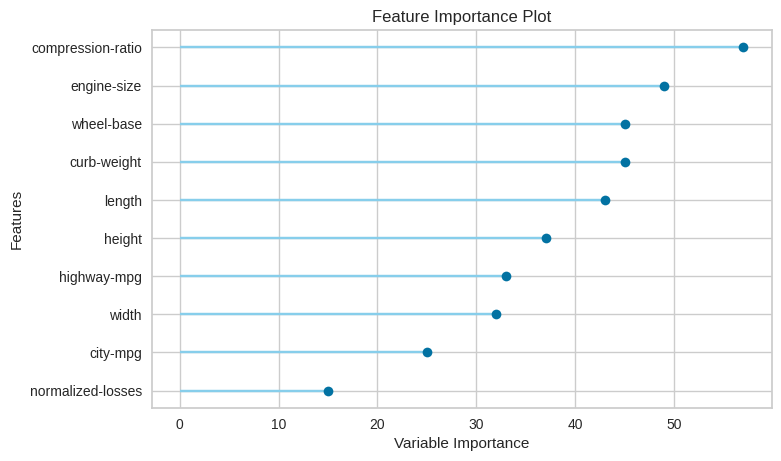

In [ ]:
# check feature importance
plot_model(lightgbm, plot = 'feature')

Guardar  Modelo 

In [ ]:
# finalize the model
final_best = finalize_model(lightgbm)
# save model to disk
save_model(final_best, 'auto-pipeline')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                  

In [ ]:
# finalize the model
final_best = finalize_model(lightgbm)
# save model to disk
save_model(final_best, 'automobile-pipeline')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                                                                          learning_rate=0.1,
                                                                          max_depth=-1,
                                                                          min_child_samples=20,
                                    